In [ ]:
# Alice Clausing   May 2023
# Gnu General Public License V3
# Magnitudes (Richter scale) of 20 earthquakes near Fiji between 1964 and 1974
# Construct frequency diagram and plot



In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Magnitudes (Richter scale) of 20 earthquakes near Fiji between 1964 and 1974
values_seq = [4.7, 4.3, 4.5, 4.8, 5.1, 5.5, 4.7, 4.4, 4.7, 4.6, 4.5, 5.7, 4.9, 4.5, 4.3, 4.1, 4.3, 4.6, 5.1, 4.7]



In [3]:
# Create dataFrame with these columns:
#  - Value (dataFrame index)
#  - Frequency
#  - Relative frequency
#  - Cumulative frequency
#  - Cumulative Relative Frequency
# Sort by ascending value (not by frequency)
COLUMNS = ('Value', 'Frequency', 'RelativeFreq', 'CumFreq', 'CumRelFreq')
# df = pd.DataFrame(columns=('Value', 'Frequency', 'RelativeFreq', 'CumFreq', 'CumRelFreq'))
df = pd.DataFrame(columns=COLUMNS)


In [4]:
# Fill in the Frequency column
for value in values_seq:
	try:
		df_row = df.loc[value]
	except KeyError:
		# Need to add value to DataFrame
		# df_row = pd.Series([value, 1, 0.0, 0, 0.0], index = ['Value', 'Frequency', 'RelativeFreq', 'CumFreq', 'CumRelFreq'])
		df_row = pd.Series([value, 1, 0.0, 0, 0.0], index = COLUMNS)
	except:
		print("Something else went wrong, KeyError occurred")
	else:
		# Value already in DataFrame
		df_row["Frequency"] = df_row["Frequency"] + 1
	finally:   # Put back into DataFrame
		df.loc[value] = df_row
# Sort by Value
df.sort_index(axis="index", inplace=True)

In [5]:
# Fill in Relative Frequency, Cumulative Frequency, Cumulative Relative Frequency columns
# https://www.geeksforgeeks.org/different-ways-to-iterate-over-rows-in-pandas-dataframe/#
nbr_values = float(len(values_seq))
prev_cum_freq = 0
prev_cum_relative_freq = 0.0
for ind in df.index:
	freq = df["Frequency"][ind]
	df["CumFreq"][ind] = prev_cum_freq + freq
	rel_freq = float(freq) / nbr_values
	df["RelativeFreq"][ind] = rel_freq
	df["CumRelFreq"][ind] = prev_cum_relative_freq + rel_freq
	
	prev_cum_freq = prev_cum_freq + freq
	prev_cum_relative_freq = prev_cum_relative_freq + rel_freq

In [6]:
# Frequency and CumFreq columns are integers
df = df.astype({'Frequency': 'int64', 'CumFreq': 'int64'})
df

,Value,Frequency,RelativeFreq,CumFreq,CumRelFreq
4.1,4.1,1,0.05,1,0.05
4.3,4.3,3,0.15,4,0.20
4.4,4.4,1,0.05,5,0.25
4.5,4.5,3,0.15,8,0.40
4.6,4.6,2,0.10,10,0.50
4.7,4.7,4,0.20,14,0.70
4.8,4.8,1,0.05,15,0.75
4.9,4.9,1,0.05,16,0.80
5.1,5.1,2,0.10,18,0.90
5.5,5.5,1,0.05,19,0.95


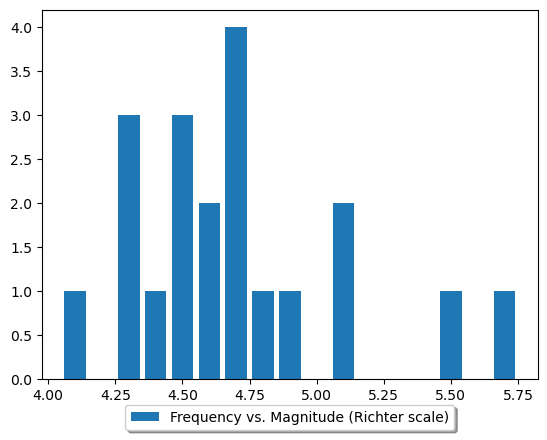

In [7]:
# Plot Frequency as bar chart
x = df['Value'].to_numpy()
y = df['Frequency'].to_numpy()

plt.bar(x,y,width = 0.08, label="Frequency vs. Magnitude (Richter scale)")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=2)
plt.show()

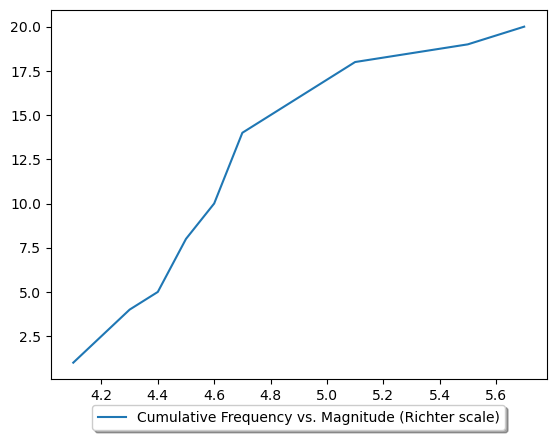

In [8]:
# Plot Cumulative Frequency (on y-axis) vs. value (on x-axis)
x=df['Value'].to_numpy()
y=df['CumFreq'].to_numpy()
plt.plot(x, y, label="Cumulative Frequency vs. Magnitude (Richter scale)")  
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=2)
plt.show()